In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
path = 'medical_insurance_dataset.csv'
df = pd.read_csv(path, header=None)
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [9]:
headers = ['age','gender','bmi','no_of_children','smoker','region','charges']
df.columns = headers

In [12]:
df.replace('?', np.nan, inplace = True)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [16]:
# to identify the columns that have some 'Null' (or NaN) information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [46]:
# Handling missing data and updating correct data types
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'].fillna(0, inplace=True)
average_age = df['age'].astype('int').mean(axis=0)
df['age'].replace(0, average_age, inplace=True)
df['smoker'].value_counts().idxmax()
df['smoker'] = pd.to_numeric(df['smoker'], errors='coerce')
df['smoker'].astype('int')
df['smoker'].replace(np.nan, '0', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   float64
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   float64
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 151.7 KB


In [49]:
# Updating the charges column such that all values are rounded to nearest 2 decimal places
df[['charges']] = np.round(df[['charges']], 2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19.0,1,27.900,0,1.0,3,16884.92
1,18.0,2,33.770,1,0.0,4,1725.55
2,28.0,2,33.000,3,0.0,4,4449.46
3,33.0,2,22.705,0,0.0,1,21984.47
4,32.0,2,28.880,0,0.0,1,3866.86


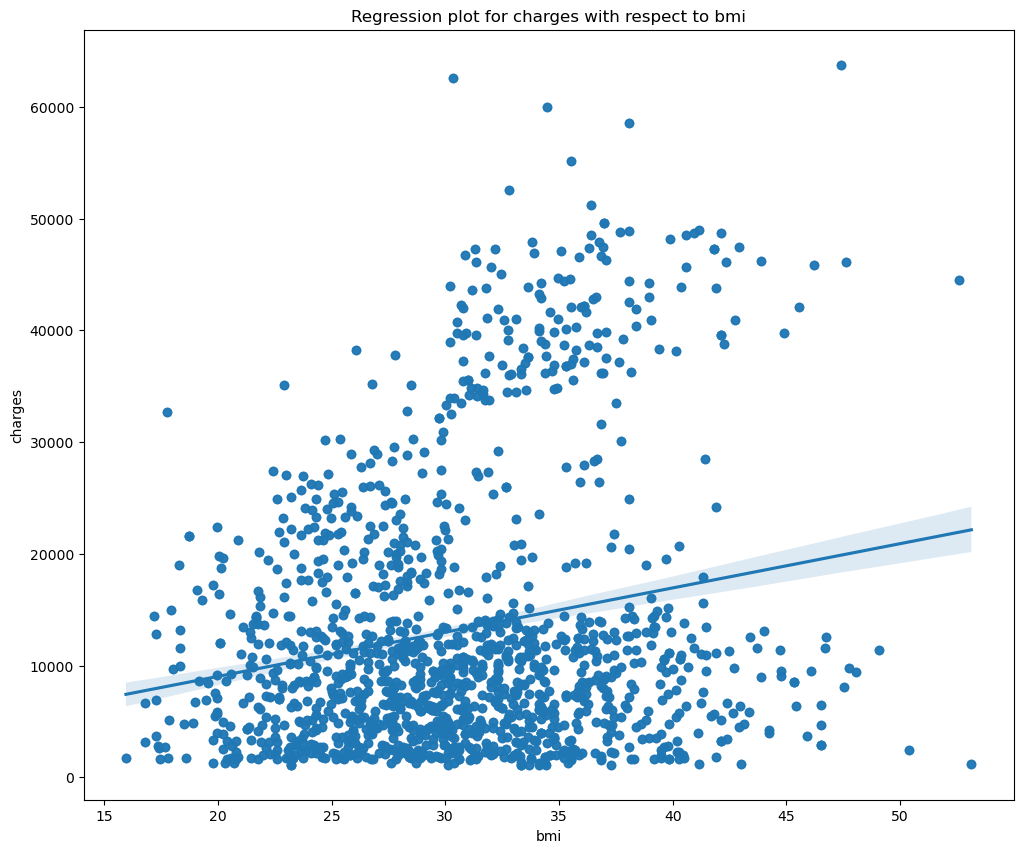

In [53]:
# Implementing the regression plot for charges with respect to bmi
width=12
height=10
plt.figure(figsize=(width,height))
sns.regplot(x='bmi', y='charges' ,data=df)
plt.title('Regression plot for charges with respect to bmi')
plt.show()
plt.close()

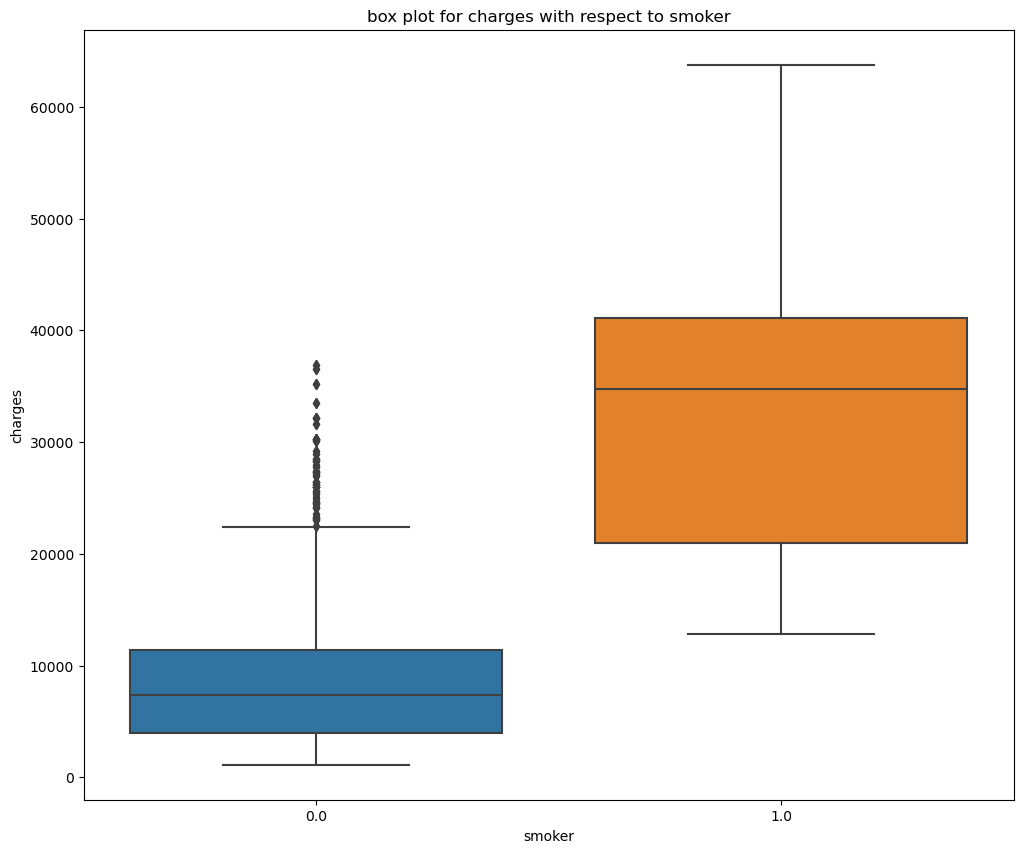

In [57]:
# Implementing the box plot for charges with respect to smoker.
plt.figure(figsize=(width,height))
plt.title('box plot for charges with respect to smoker')
sns.boxplot(x='smoker', y='charges',data=df)
plt.show()
plt.close()

In [61]:
# correlation matrix for the dataset
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026043,0.113047,0.037579,-0.023286,-0.007171,0.298623
gender,-0.026043,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113047,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037579,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007171,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298623,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


In [65]:
# Fitting a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset.
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df[['smoker']]
Y = df['charges']

lm.fit(X,Y)
lm.score(X,Y)

0.6221791733924185

In [71]:
# Fitting a linear regression model that may be used to predict the charges value, just by using all other attributes of the dataset.
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.7504074093266571


In [ ]:
# There is an improvement in performance in this model

In [75]:
# Creating a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
pipe.score(Z,Y)

0.8451866239902264

In [ ]:
# There is an even further improvement in performance


In [79]:
# Splitting the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.
Z_train, Z_test, Y_train, Y_test = train_test_split(Z, Y, test_size=0.2, random_state=0)

In [83]:
# Initializing a Ridge regressor that uses hyperparameter alpha=1
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

RR = Ridge(alpha=0.1)
RR.fit(Z_train, Y_train)
yhat = RR.predict(Z_test)
r2_score(Y_test, yhat)

0.7469861345148645

In [87]:
# Applying polynomial transformation to the training parameters with degree=2. Using this transformed feature set to fit the same regression model, as above,
from sklearn.metrics import r2_score
poly1 = PolynomialFeatures(degree=2)
Z_train_poly = poly1.fit_transform(Z_train)
Z_test_poly = poly1.fit_transform(Z_test)

RR.fit(Z_train_poly, Y_train)
Yhat = RR.predict(Z_test_poly)
r2_score(Y_test, Yhat)

0.8410006423329642

In [90]:
df.to_csv('medical_insurance_dataset_clean.csv')